In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dat_train=pd.read_csv('/content/drive/My Drive/DL/Google_Stock_Price_Train.csv')
dat_train.shape

(1258, 6)

In [ ]:
dat_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
dat_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


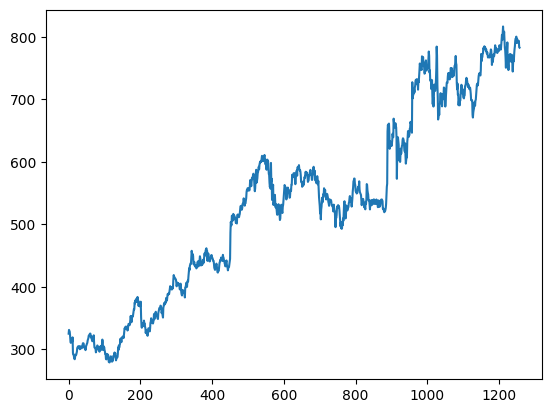

In [ ]:
plt.plot(dat_train['Open'])

In [ ]:
training_set=dat_train.iloc[:,1:2].values

In [ ]:
len(training_set)

1258

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_sc=sc.fit_transform(training_set)

In [ ]:
training_set_sc

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
#creating a data structure with 60 timesteps and one output
X_train=[]
y_train=[]
for i in range(60,1258):
  X_train.append(training_set_sc[i-60:i,0])
  y_train.append(training_set_sc[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [ ]:
X_train.shape,y_train.shape

((1198, 60), (1198,))

In [ ]:
#Reshaping suitable for Tensorflow workflow
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
X_train.shape,y_train.shape

((1198, 60, 1), (1198,))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
#Initialize the RNN
model=Sequential()
model.add(LSTM(units=100,input_shape=(X_train.shape[1],1)))

In [ ]:
#Output Layer
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 4s 39ms/step - loss: 0.0014
Epoch 2/100
38/38 [==============================] - 2s 51ms/step - loss: 6.4633e-04
Epoch 3/100
38/38 [==============================] - 2s 42ms/step - loss: 6.0421e-04
Epoch 4/100
38/38 [==============================] - 1s 32ms/step - loss: 6.9540e-04
Epoch 5/100
38/38 [==============================] - 1s 31ms/step - loss: 6.3332e-04
Epoch 6/100
38/38 [==============================] - 1s 31ms/step - loss: 5.7889e-04
Epoch 7/100
38/38 [==============================] - 1s 31ms/step - loss: 5.7535e-04
Epoch 8/100
38/38 [==============================] - 1s 31ms/step - loss: 5.9163e-04
Epoch 9/100
38/38 [==============================] - 1s 31ms/step - loss: 5.1834e-04
Epoch 10/100
38/38 [==============================] - 1s 31ms/step - loss: 5.6139e-04
Epoch 11/100
38/38 [==============================] - 1s 31ms/step - loss: 4.9238e-04
Epoch 12/100
38/38 [==============================] - 2s 49ms/step 

In [ ]:
#Making the prediction and visualizing the result
dat_test=pd.read_csv('/content/drive/My Drive/DL/Google_Stock_Price_Test.csv')
dat_test.shape

(20, 6)

In [ ]:
dat_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
#getting the real stock price of 2017
real_stock_price=dat_test.iloc[:,1:2].values
real_stock_price.shape

(20, 1)

In [ ]:
#getting the predicted stock price of 2017
dat_total=pd.concat((dat_train['Open'],dat_test['Open']),axis=0)
inputs=dat_total[len(dat_total)-len(dat_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs.shape

(80, 1)

In [ ]:
inputs_sc=sc.transform(inputs)
X_test=[]
for i in range(60,inputs.shape[0]):
  X_test.append(inputs_sc[i-60:i,0])
X_test=np.array(X_test)

In [ ]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(20, 60, 1)

In [ ]:
predicted_stock_price=model.predict(X_test)
predicted_stock_price.shape

1/1 [==============================] - 1s 987ms/step


(20, 1)

In [ ]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

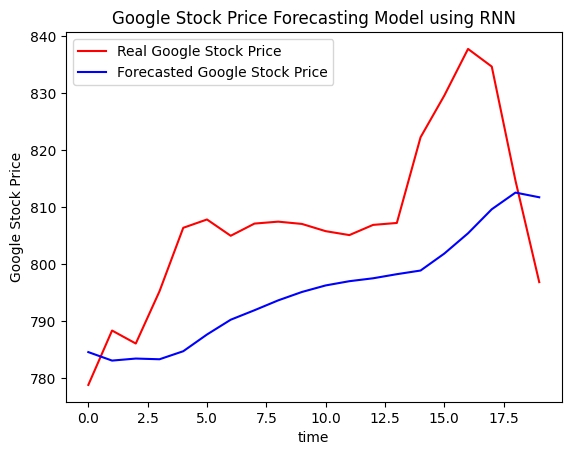

In [ ]:
#Visualizing the results
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Forecasted Google Stock Price')
plt.title('Google Stock Price Forecasting Model using RNN')
plt.xlabel('time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [ ]:
mse=np.mean((real_stock_price-predicted_stock_price)**2)
rmse=np.sqrt(mse)
print(rmse)

13.170566293883846
